# Generate radomized dataset

In [14]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

In [15]:
# household data
n_households = 1000
Locations = ["Location1", "Location2", "Location3", "Location4", "Location5"]

household_data = {
    'Household ID': list(range(n_households)),
    'Number': np.random.randint(low=1, high=10, size=n_households),
    'Location': [random.choice(Locations) for _ in range(n_households)]
}

household_df = pd.DataFrame(household_data)
print("Household dataset:\n", household_df)

Household dataset:
      Household ID  Number   Location
0               0       4  Location1
1               1       3  Location2
2               2       3  Location1
3               3       7  Location2
4               4       4  Location2
..            ...     ...        ...
995           995       1  Location1
996           996       5  Location4
997           997       7  Location3
998           998       6  Location5
999           999       2  Location5

[1000 rows x 3 columns]


In [18]:
# time stamps
start_date = datetime.strptime('20230301', '%Y%m%d')
end_date = datetime.strptime('20230531', '%Y%m%d')
delta = timedelta(hours=1)

time_data = {
    'Time ID': [],
    'Date': [],
    'Start time': [],
    'End time': []
}

current_date = start_date
time_id = 0
while current_date <= end_date:
    time_data['Time ID'].append(time_id)
    time_data['Date'].append(current_date.date())
    time_data['Start time'].append(current_date.time())
    current_date += delta
    time_data['End time'].append(current_date.time())
    time_id += 1

time_df = pd.DataFrame(time_data)
print("Time dataset:\n", time_df)

Time dataset:
       Time ID        Date Start time  End time
0           0  2023-03-01   00:00:00  01:00:00
1           1  2023-03-01   01:00:00  02:00:00
2           2  2023-03-01   02:00:00  03:00:00
3           3  2023-03-01   03:00:00  04:00:00
4           4  2023-03-01   04:00:00  05:00:00
...       ...         ...        ...       ...
2180     2180  2023-05-30   20:00:00  21:00:00
2181     2181  2023-05-30   21:00:00  22:00:00
2182     2182  2023-05-30   22:00:00  23:00:00
2183     2183  2023-05-30   23:00:00  00:00:00
2184     2184  2023-05-31   00:00:00  01:00:00

[2185 rows x 4 columns]


In [21]:
time_df.dtypes

Time ID        int64
Date          object
Start time    object
End time      object
dtype: object

In [22]:
# consumptions

consumption_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

consumption_data = {
    'Household ID': [],
    'Time ID': [],
    'Amount': []
}

for household_id in range(n_households):
    for time_id in range(len(time_df)):
        consumption_data['Household ID'].append(household_id)
        consumption_data['Time ID'].append(time_id)
        consumption_data['Amount'].append(random.choice(consumption_values))

consumption_df = pd.DataFrame(consumption_data)
print("Consumption dataset:\n", consumption_df)

Consumption dataset:
          Household ID  Time ID  Amount
0                   0        0     0.5
1                   0        1     0.1
2                   0        2     0.1
3                   0        3     0.0
4                   0        4     0.2
...               ...      ...     ...
2184995           999     2180     0.0
2184996           999     2181     0.4
2184997           999     2182     0.3
2184998           999     2183     0.1
2184999           999     2184     0.3

[2185000 rows x 3 columns]


In [20]:
# pricing 

price_rate_map = {0: 10, 0.1: 20, 0.2: 30, 0.3: 40, 0.4: 50, 0.5: 60}

price_data = {
    'Amount': list(price_rate_map.keys()),
    'Price rate': list(price_rate_map.values())
}

price_df = pd.DataFrame(price_data)
print("Price dataset:\n", price_df)

Price dataset:
    Amount  Price rate
0     0.0          10
1     0.1          20
2     0.2          30
3     0.3          40
4     0.4          50
5     0.5          60


# Merge dataframes

In [ ]:
# Merge the consumption and household datasets
merged_df = pd.merge(consumption_df, household_df, on='Household ID', how='left')

# Merge with the time dataset
merged_df = pd.merge(merged_df, time_df, on='Time ID', how='left')

# Merge with the price dataset
merged_df = pd.merge(merged_df, price_df, left_on='Amount', right_on='Amount', how='left') # Pay attention to the space in 'Amount '

# Create new column Total amount
merged_df['Total amount'] = merged_df['Amount'] * merged_df['Price rate']

# Select necessary columns
final_df = merged_df[['Time ID', 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount']]

final_df.head(10)
# print(final_df.to_string(index=False))

In [ ]:
# Merge the consumption and household datasets
merged_df = pd.merge(consumption_df, household_df, on='Household ID', how='left')

# Merge with the time dataset
merged_df = pd.merge(merged_df, time_df, on='Time ID', how='left')

# Merge with the price dataset
merged_df = pd.merge(merged_df, price_df, on='Amount', how='left')

# Create new column Total amount
merged_df['Total amount'] = merged_df['Amount'] * merged_df['Price rate']

# Select necessary columns
final_df = merged_df[['Time ID', 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount']]

print(final_df.to_string(index=False))

In [ ]:
final_df.info()

In [ ]:
final_df.describe()

In [ ]:
final_df["Date2"] = pd.to_datetime(final_df["Date"])

In [ ]:
final_df["Date2"] 

In [ ]:
final_df.values

In [ ]:
final_df.index

In [ ]:
final_df['Start time'] = pd.to_datetime(final_df['Start time'], format='%H:%M:%S').dt.time

final_df['Start time']


In [ ]:
final_df['Start time'].dtype

In [ ]:
final_df['Start time'] = final_df['Start time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').time)

print(final_df['Start time'].dtype)

In [ ]:
import datetime
from datetime import datetime

In [ ]:
final_df['Start time'] = pd.to_datetime(final_df['Start time'], format='%H:%M:%S').dt.time

In [ ]:
final_df['Start time']

In [ ]:
time_deltas = [datetime.strptime(t, '%H:%M:%S').time() for t in final_df['Start time']]
time_deltas = [timedelta(hours=t.hour, minutes=t.minute, seconds=t.second) for t in time_deltas]

# Output the timedelta values
for delta in time_deltas:
    print(delta)

In [ ]:
final_df

In [ ]:
merged_data = pd.merge(final_df, household_df, on='Household ID', how='left')
merged_data

In [ ]:
merged_data['Start time'] = pd.to_datetime(merged_data['Start time'], format='%H:%M:%S').dt.time


In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

In [33]:
# visualizations
data = pd.read_csv('merged_data.csv')

In [34]:
data['Datetime Start'] = pd.to_datetime(data['Datetime Start'])
data['Datetime end'] = pd.to_datetime(data['Datetime end'])

In [35]:
data.dtypes

Date                      object
Start time                object
End time                  object
Household ID             float64
Amount                   float64
Total amount             float64
Number                   float64
Location                  object
Datetime Start    datetime64[ns]
Datetime end      datetime64[ns]
dtype: object

In [37]:
data.dropna()

,Date,Start time,End time,Household ID,Amount,Total amount,Number,Location,Datetime Start,Datetime end
0,3/1/2023,12:00:00 AM,1:00:00 AM,0.0,0.1,2.0,8.0,Location5,2023-03-01 00:00:00,2023-03-01 01:00:00
1,3/1/2023,1:00:00 AM,2:00:00 AM,0.0,0.0,0.0,8.0,Location5,2023-03-01 01:00:00,2023-03-01 02:00:00
2,3/1/2023,2:00:00 AM,3:00:00 AM,0.0,0.5,30.0,8.0,Location5,2023-03-01 02:00:00,2023-03-01 03:00:00
3,3/1/2023,3:00:00 AM,4:00:00 AM,0.0,0.4,20.0,8.0,Location5,2023-03-01 03:00:00,2023-03-01 04:00:00
4,3/1/2023,4:00:00 AM,5:00:00 AM,0.0,0.5,30.0,8.0,Location5,2023-03-01 04:00:00,2023-03-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...
804674,3/25/2023,6:00:00 PM,7:00:00 PM,368.0,0.1,2.0,8.0,Location3,2023-03-01 18:00:00,2023-03-01 19:00:00
804675,3/25/2023,7:00:00 PM,8:00:00 PM,368.0,0.4,20.0,8.0,Location3,2023-03-01 19:00:00,2023-03-01 20:00:00
804676,3/25/2023,8:00:00 PM,9:00:00 PM,368.0,0.1,2.0,8.0,Location3,2023-03-01 20:00:00,2023-03-01 21:00:00
804677,3/25/2023,9:00:00 PM,10:00:00 PM,368.0,0.3,12.0,8.0,Location3,2023-03-01 21:00:00,2023-03-01 22:00:00


In [38]:
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

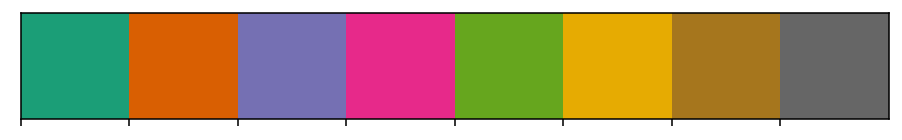

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import seaborn as sns
import os 
plt.rcParams['figure.dpi'] = 140

palette="Dark2"
sns.set_palette(palette)
sns.palplot(sns.color_palette(palette))
plt.show()

In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount', 'Number', 'Location', 'Datetime Start', and 'Datetime end'

# Filter the data for Location 5
location5_data = data[data['Location'] == 'Location5']

# Calculate the total amount for each household within a month
household_monthly_amount = location5_data.groupby(['Household ID', pd.Grouper(key='Datetime Start', freq='M')])['Amount'].sum().reset_index()

# Sort the data based on the total amount in ascending order
sorted_households = household_monthly_amount.sort_values('Amount')

# Select the top 5 households with the least total amount
top5_least_amount_households = sorted_households.head(5)['Household ID'].tolist()

@interact
def plot_amount_by_household(start_time=data['Datetime Start'].min().strftime('%Y-%m-%d %H:%M:%S'), end_time=data['Datetime end'].max().strftime('%Y-%m-%d %H:%M:%S')):
    filtered_df = data[(data['Datetime Start'] >= start_time) & (data['Datetime end'] <= end_time) & (data['Location'] == 'Location5') & (data['Household ID'].isin(top5_least_amount_households))]
    
    fig = px.bar(filtered_df, x='Datetime Start', y='Amount', color='Household ID', title='Amount by Household')
    fig.show()

interactive(children=(Text(value='2023-03-01 00:00:00', description='start_time'), Text(value='2023-03-01 23:0…

In [52]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact_manual, widgets

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount', 'Number', 'Location', 'Datetime Start', and 'Datetime end'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Define the interact_manual function with filters for Number and Location
@interact_manual(number=data['Number'].unique(), location=data['Location'].unique())
def plot_amount_by_day(number, location):
    # Filter the data based on selected Number and Location
    filtered_data = data[(data['Number'] == number) & (data['Location'] == location)]

    # Group the data by Date and calculate the average amount
    avg_amount_by_day = filtered_data.groupby('Date')['Amount'].mean()

    # Group the data by month and calculate the average amount
    avg_amount_by_month = filtered_data.groupby(filtered_data['Date'].dt.to_period('M'))['Amount'].mean()

    # Convert Period index to strings
    avg_amount_by_month.index = avg_amount_by_month.index.astype(str)

    # Create the bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(x=avg_amount_by_day.index, y=avg_amount_by_day, name='Daily Average Amount', marker_color='blue'))
    fig.add_trace(go.Scatter(x=avg_amount_by_month.index, y=avg_amount_by_month, mode='lines', name='Monthly Average Amount', line_color='red'))
    fig.update_layout(title=f'Average Amount by Day and Month for Number {number} in {location}',
                      xaxis_title='Date', yaxis_title='Amount')
    fig.show()

interactive(children=(Dropdown(description='number', options=(8.0, 1.0, 7.0, 2.0, 6.0, 3.0, 4.0, 9.0, 5.0, nan…

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

In [53]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount', 'Number', 'Location', 'Datetime Start', and 'Datetime end'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Function to create scatter plot
def create_scatter_plot(location):
    fig = px.scatter(data[data['Location'] == location], x='Household ID', y='Amount', color='Location', title=f'Utility Usage Scatter Plot - {location}')
    fig.update_layout(xaxis_title='Household ID', yaxis_title='Amount')
    fig.show()

# Function to create dashboard
@interact
def utility_usage_dashboard(location=widgets.Dropdown(options=data['Location'].unique(), description='Location:')):
    # Filter the data based on selected location
    filtered_data = data[data['Location'] == location]

    # Calculate the total utility usage by household
    total_usage_by_household = filtered_data.groupby('Household ID')['Amount'].sum().reset_index()

    # Create bar chart for total utility usage
    bar_fig = px.bar(total_usage_by_household, x='Household ID', y='Amount', title=f'Total Utility Usage by Household - {location}',
                     labels={'Amount': 'Total Usage'})
    bar_fig.update_layout(xaxis_title='Household ID', yaxis_title='Total Usage')
    bar_fig.show()

    # Create scatter plot for utility usage
    create_scatter_plot(location)

interactive(children=(Dropdown(description='Location:', options=('Location5', 'Location2', 'Location4', 'Locat…

In [54]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount', 'Number', 'Location', 'Datetime Start', and 'Datetime end'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Function to create scatter plot
def create_scatter_plot(location):
    fig = px.scatter(data[data['Location'] == location], x='Date', y='Amount', color='Household ID', title=f'Utility Usage Scatter Plot - {location}')
    fig.update_layout(xaxis_title='Date', yaxis_title='Amount')
    fig.show()

# Function to create dashboard
@interact
def utility_usage_dashboard(location=widgets.Dropdown(options=data['Location'].unique(), description='Location:')):
    # Filter the data based on selected location
    filtered_data = data[data['Location'] == location]

    # Calculate the total utility usage by date
    total_usage_by_date = filtered_data.groupby('Date')['Amount'].sum().reset_index()

    # Create bar chart for total utility usage
    bar_fig = px.bar(total_usage_by_date, x='Date', y='Amount', title=f'Total Utility Usage by Date - {location}',
                     labels={'Amount': 'Total Usage'})
    bar_fig.update_layout(xaxis_title='Date', yaxis_title='Total Usage')
    bar_fig.show()

    # Create scatter plot for utility usage
    create_scatter_plot(location)

interactive(children=(Dropdown(description='Location:', options=('Location5', 'Location2', 'Location4', 'Locat…

In [57]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount', 'Number', 'Location', 'Datetime Start', and 'Datetime end'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Function to create scatter plot

def create_scatter_plot(location):
    fig = px.scatter(data[data['Location'] == location], x='Date', y='Amount', color='Number', title=f'Utility Usage Scatter Plot - {location}')
    fig.update_layout(xaxis_title='Date', yaxis_title='Amount')
    fig.show()


# Function to create dashboard
@interact
def utility_usage_dashboard(location=widgets.Dropdown(options=data['Location'].unique(), description='Location:')):
    # Filter the data based on selected location
    filtered_data = data[data['Location'] == location]

    # Calculate the total utility usage by date
    total_usage_by_date = filtered_data.groupby('Date')['Amount'].sum().reset_index()

    # Create bar chart for total utility usage
    bar_fig = px.bar(total_usage_by_date, x='Date', y='Amount', title=f'Total Utility Usage by Date - {location}',
                     labels={'Amount': 'Total Usage'})
    bar_fig.update_layout(xaxis_title='Date', yaxis_title='Total Usage')
    bar_fig.show()

    # Create scatter plot for utility usage
    create_scatter_plot(location)


interactive(children=(Dropdown(description='Location:', options=('Location5', 'Location2', 'Location4', 'Locat…

In [65]:
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Amount'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by the 'Date' column and calculate the average amount used
average_amount_by_date = data.groupby('Date')['Amount'].mean()

# Create a scatter plot
scatter_fig = go.Figure(data=go.Scatter(
    x=average_amount_by_date.index,
    y=average_amount_by_date.values,
    mode='markers',
    marker=dict(
        size=10,
        color=average_amount_by_date.values,
        colorscale='Viridis',
        showscale=True
    ),
    text=average_amount_by_date.index.strftime('%Y-%m-%d')
))

scatter_fig.update_layout(
    title='Average Utility Usage by Date',
    xaxis_title='Date',
    yaxis_title='Average Amount'
)

scatter_fig.show()


In [70]:
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Number', 'Amount', and 'Location'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Function to create scatter plot
def create_scatter_plot(location):
    

    # Group the filtered data by the 'Date' and 'Number' columns and calculate the average amount used
    average_amount_by_number = filtered_data.groupby(['Date', 'Number'])['Amount'].mean().reset_index()

    # Create a scatter plot
    scatter_fig = go.Figure()

    for number in average_amount_by_number['Number'].unique():
        number_data = average_amount_by_number[average_amount_by_number['Number'] == number]
        scatter_fig.add_trace(go.Scatter(
            x=number_data['Date'],
            y=number_data['Amount'],
            mode='markers',
            marker=dict(
                size=10,
                color=number,
                colorscale='Viridis',
                showscale=False
            ),
            name=f'Number {number}'
        ))

    scatter_fig.update_layout(
        title=f'Average Utility Usage by Number - {location}',
        xaxis_title='Date',
        yaxis_title='Average Amount'
    )
    scatter_fig.update_layout(
        title=f'Average Utility Usage by Number - {number}',
        xaxis_title='Date',
        yaxis_title='Average Amount'
    )

    scatter_fig.show()


# Function to create dashboard
@interact
def utility_usage_dashboard(location=widgets.Dropdown(options=data['Location'].unique(), description='Location:')):
    create_scatter_plot(location)


interactive(children=(Dropdown(description='Location:', options=('Location5', 'Location2', 'Location4', 'Locat…

In [76]:
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
import plotly.offline as offline

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Number', 'Amount', and 'Location'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Function to create scatter plot
def create_scatter_plot(location, number):
    filtered_data = data[(data['Location'] == location) & (data['Number'] == number)]

    # Group the filtered data by the 'Date' and 'Number' columns and calculate the average amount used
    average_amount_by_number = filtered_data.groupby(['Date', 'Number'])['Amount'].mean().reset_index()

    # Create a scatter plot
    scatter_fig = go.Figure()

    scatter_fig.add_trace(go.Scatter(
        x=average_amount_by_number['Date'],
        y=average_amount_by_number['Amount'],
        mode='markers',
        marker=dict(
            size=10,
            color=average_amount_by_number['Number'],
            colorscale='Viridis',
            showscale=False
        ),
        text=filtered_data['Household ID'],
        name=f'Number {number}'
    ))

    scatter_fig.update_layout(
        title=f'Average Utility Usage by Number - {location}',
        xaxis_title='Date',
        yaxis_title='Average Amount'
    )

    scatter_fig.show()


# Function to create dashboard
@interact
def utility_usage_dashboard(location=widgets.Dropdown(options=data['Location'].unique(), description='Location:'),
                            number=widgets.Dropdown(options=data['Number'].unique(), description='Number:')):
    scatter_fig = create_scatter_plot(location, number)
    offline.plot(scatter_fig, filename='utility_dashboard.html', auto_open=True)

interactive(children=(Dropdown(description='Location:', options=('Location5', 'Location2', 'Location4', 'Locat…

In [82]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact_manual, widgets

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Start time', 'End time', 'Household ID', 'Amount', 'Total amount', 'Number', 'Location', 'Datetime Start', and 'Datetime end'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Define the interact_manual function with filters for Number and Location
@interact_manual(number=data['Number'].unique(), location=data['Location'].unique())
def plot_amount_by_day(number, location):
    # Filter the data based on selected Number and Location
    filtered_data = data[(data['Number'] == number) & (data['Location'] == location)]

    # Group the data by Date and calculate the average amount for each day and household
    avg_amount_by_day_household = filtered_data.groupby(['Date', 'Household ID'])['Amount'].mean().reset_index()

    # Group the data by month and calculate the average amount considering all households
    avg_amount_by_month = avg_amount_by_day_household.groupby(avg_amount_by_day_household['Date'].dt.to_period('M'))['Amount'].mean()

    # Convert Period index to strings
    avg_amount_by_month.index = avg_amount_by_month.index.astype(str)

    # Create the bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(x=avg_amount_by_day_household['Date'], y=avg_amount_by_day_household['Amount'], name='Daily Average Amount', marker_color='blue'))

    # Calculate the average amount line considering all households
    avg_line = avg_amount_by_day_household['Amount'].mean()

    # Create a trace for the area above the average line
    fig.add_trace(go.Bar(x=avg_amount_by_day_household['Date'], y=[avg_line]*len(avg_amount_by_day_household), name='Above Average', marker_color='red',
                         base=avg_amount_by_day_household['Amount'], offset=0, hoverinfo='skip'))

    fig.add_trace(go.Scatter(x=avg_amount_by_month.index, y=avg_amount_by_month, mode='lines', name='Monthly Average Amount', line_color='red'))
    fig.update_layout(title=f'Average Amount by Day and Month for Number {number} in {location}',
                      xaxis_title='Date', yaxis_title='Amount')
    fig.show()


interactive(children=(Dropdown(description='number', options=(8.0, 1.0, 7.0, 2.0, 6.0, 3.0, 4.0, 9.0, 5.0, nan…

In [90]:
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
import plotly.offline as offline

# Assuming you have a DataFrame named 'data' with columns 'Date', 'Number', 'Amount', and 'Location'

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Function to create scatter plot
def create_scatter_plot(location, number, threshold):
    filtered_data = data[(data['Location'] == location) & (data['Number'] == number)]

    # Group the filtered data by the 'Date' and 'Number' columns and calculate the average amount used
    average_amount_by_number = filtered_data.groupby(['Date', 'Number'])['Amount'].mean().reset_index()

    # Create a scatter plot
    scatter_fig = go.Figure()

    scatter_fig.add_trace(go.Scatter(
        x=average_amount_by_number['Date'],
        y=average_amount_by_number['Amount'],
        mode='markers',
        marker=dict(
            size=10,
            color=average_amount_by_number['Amount'] > threshold,
            colorscale=['blue', 'red'],  # Use blue for values below threshold, and red for values above threshold
            showscale=False
        ),
        text=filtered_data['Household ID'],
        name=f'Number {number}'
    ))

    scatter_fig.update_layout(
        title=f'Average Utility Usage by Number - {location}',
        xaxis_title='Date',
        yaxis_title='Average Amount'
    )

    scatter_fig.show()


# Function to create dashboard
@interact
def utility_usage_dashboard(location=widgets.Dropdown(options=data['Location'].unique(), description='Location:'),
                            number=widgets.Dropdown(options=data['Number'].unique(), description='Number:'),
                            threshold=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.27, description='Threshold:')):
    scatter_fig = create_scatter_plot(location, number, threshold)
    offline.plot(scatter_fig, filename='utility_dashboard.html', auto_open=True)

interactive(children=(Dropdown(description='Location:', options=('Location5', 'Location2', 'Location4', 'Locat…